In [2]:
import numpy as np
import scipy as spe
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
import scienceplots
import matplotlib
from matplotlib import rc
#matplotlib.rcParams['animation.embed_limit'] = 2**128
rc('animation', html='jshtml')

plt.style.use(['science', 'no-latex'])

## FREE 1D PARTICLE

Let a particle of mass $m$ moving freely in a straight line. This means the particle is subject to a potential $V(x) = 0 \, \ \forall x \in \mathbb{R}$. The state of the particle is described by the wavefunction $\psi \in \mathcal{H}=\mathcal{L}^2(\mathbb{R})$ and follows the Schrödinger Equation 

\begin{equation*}
    H \psi = i \hbar \frac{\partial \psi}{\partial t} \implies \left(-\frac{\hbar^2}{2m}\nabla^2+V(x)\right)\psi = i\hbar \frac{\partial \psi}{\partial t} \implies -\frac{\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2}=i\hbar \frac{\partial \psi}{\partial t}
 \end{equation*}

In operator form, we have $L \psi = 0$, being $L = \frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+i\hbar \frac{\partial }{\partial t} \implies L$ is a separable linear differential operator. Let us take an Ansatz: 
$$\psi(x,t) = c(t)\phi(x)e^{-i\frac{E(p)t}{\hbar}}$$

We will only deal here with classical energy, so for a free particle we have pure kinetic  energy: $ E(p) = \frac{p^2}{2m} $. Let us expand our solution as a Fourier (Inverse) Transform:
$$
\psi(x,t) = \mathcal{F}^{-1}(e^{-ip^2/2m}) = \int_{\mathbb{R}}\frac{dp}{\sqrt{2\pi \hbar}}c(p)e^{e^{-i\left(\frac{p^2}{2m}t-px\right)/\hbar}}
$$

We have that $c(p)$ is the Fourier transform for the initial condition: $c(p) = \mathcal{F}(\psi(x,0))$

### Gaussian distribution

Let us consider a particle whose state is a normal distribution at the initial instant $t_0 = 0$ (w.l.o.g): 
$$
\psi (x, 0) = \left(\frac{2 \alpha}{\pi}\right)^{\frac{1}{4}}e^{-\alpha x^2}
$$

The Fourier Transform of a Gaussian Distribution is well known result: $\mathcal{F}(e^{-\alpha x^2})(k) = \frac{1}{\sqrt{2\alpha}}e^{-\frac{k^2}{4\alpha}}$. Then, the Fourier Transform of our initial condition is $c(p) = \left(\frac{1}{2\pi \alpha}\right)^{\frac{1}{4}}e^{-\frac{p^2}{2\alpha \hbar}}$. So our final solution will be:

$$
\psi(x, t) = \int_{\mathbb{R}}\frac{dp}{\sqrt{2 \pi \hbar}}\left[\left(\frac{1}{2\pi \alpha}\right)^{\frac{1}{4}}e^{-\frac{p^2}{4 \alpha \hbar^2}\left(1+\frac{i 2 \alpha \hbar t}{m}\right)}\right]e^{ipx/\hbar} = \left(\frac{1}{2 \pi \alpha}\right)^{\frac{1}{4}}\mathcal{F}^{-1}\left(e^{-\beta p^2}\right) \ , \ \beta = \frac{1}{4 \alpha \hbar^2}\left(1+\frac{i 2 \alpha \hbar t}{m}\right) \\
\psi(x, t) = \left(\frac{1}{2 \pi \alpha}\right)^{\frac{1}{4}}\frac{1}{\sqrt{2\beta}}e^{-\frac{x^2}{4\beta}} = \left(\frac{2 \alpha}{\pi}\right)^{\frac{1}{4}}\frac{1}{\sqrt{1+i\frac{2\alpha \hbar t}{m}}}\exp\left(-\frac{\alpha x^2}{1+i\frac{2\alpha \hbar t}{m}}\right)
$$

The probability density will then be

$$
|\psi(x,t)|^2 = \sqrt{\frac{2 \alpha}{\pi}}\frac{1}{\sqrt{1+\left(\frac{2\alpha \hbar t}{m}\right)^2}}\exp\left(-\frac{2\alpha x^2}{1+\left(\frac{2\alpha \hbar t}{m}\right)^2}\right)
$$

In [9]:
def wavepack(x, t, alph=1):
    func = np.sqrt(2*alph/np.pi)/np.sqrt(1+t**2)*np.exp(-alph*x**2/(1+t**2))
    return func

def dispersion(t, alph):
    disp = (1+t**2)/(4*alph)
    return disp

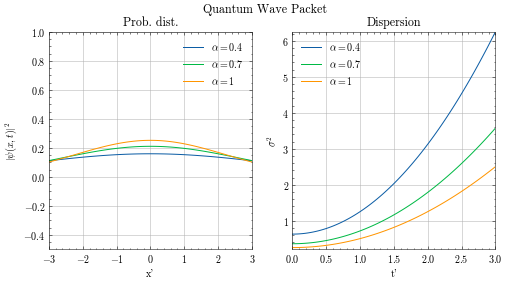

In [13]:
x = np.linspace(-3, 3, 100)
t = np.linspace(0, 3, 80)
alph1, alph2, alph3 = .4,.7, 1

fig, ax = plt.subplots(1, 2, figsize = (8,4))
ln1, = ax[0].plot([], [], label=r'$\alpha = 0.4$')
ln2, = ax[0].plot([], [], label=r'$\alpha = 0.7$')
ln3, = ax[0].plot([], [], label=r'$\alpha = 1$')
l1, = ax[1].plot([], [], label=r'$\alpha = 0.4$')
l2, = ax[1].plot([], [], label=r'$\alpha = 0.7$')
l3, = ax[1].plot([], [], label=r'$\alpha = 1$')
fig.suptitle('Quantum Wave Packet')
ax[0].set_xlim(min(x),max(x))
ax[0].set_ylim(-.5, 1)
ax[0].set_title(r"Prob. dist.")
ax[0].set_xlabel("x'")
ax[0].set_ylabel(r"$|\psi(x,t)|^2$")
ax[1].set_xlim(min(t),max(t))
ax[1].set_ylim(.2, max(dispersion(t, alph1)))
ax[1].set_title(r"Dispersion")
ax[1].set_xlabel("t'")
ax[1].set_ylabel(r"$\sigma^2$")
#ax_slider = plt.axes([0.25, 0.01, 0.65, 0.03], facecolor ='lightgoldenrodyellow')
#slider = Slider(ax_slider, label=r'$\alpha$', valmin=0, valmax=1, valinit=0)
ax[0].grid()
ax[0].legend()
ax[1].grid()
ax[1].legend()
n = len(t)

def animate(i): 
  ln1.set_data(x, wavepack(x, t[i], alph1))
  ln2.set_data(x, wavepack(x, t[i], alph2))
  ln3.set_data(x, wavepack(x, t[i], alph3))
  l1.set_data(t[:i+1], dispersion(t[:i+1], alph1))
  l2.set_data(t[:i+1], dispersion(t[:i+1], alph2))
  l3.set_data(t[:i+1], dispersion(t[:i+1], alph3))
  return ln1, ln2, ln3, l1, l2, l3

FuncAnimation(fig, animate, frames=len(t), interval=100)


### Lorentzian Free Particle

Let us now study a particle whose initial state is prepared as follows:
$$
\psi(x,0) = \sqrt{\frac{2 a^3}{\pi}}\frac{1}{a^2+x^2}
$$

This is a Lorentzian function. Its Fourier Transform is also a well known result: $\mathcal{F} \left(\frac{1}{a^2+x^2}\right)(p)= \sqrt{\frac{\pi}{2\hbar}}\frac{1}{a}e^{-a|p|/\hbar}$. Then, for our initial condition we have 

$$
\psi(x,t) = \sqrt{\frac{a}{\hbar}}\int_{\mathbb{R}}\frac{dp}{\sqrt{2\pi \hbar}}e^{-\frac{i}{\hbar}\left(\frac{p^2}{2m}t-px-i|p|a\right)} = \sqrt{\frac{a}{\hbar}}\left(\int_0^\infty\frac{dp}{\sqrt{2 \pi \hbar}}e^{-\frac{i}{\hbar}\left(\frac{p^2}{2m}t-p(x-ia)\right)}+\int_{-\infty}^0\frac{dp}{\sqrt{2 \pi \hbar}}e^{-\frac{i}{\hbar}\left(\frac{p^2}{2m}t-p(x+ia)\right)} \right)
$$

For the second term, we make the change $p \rightarrow -p$:
$$
\psi(x,t) = \sqrt{\frac{a}{\hbar}}\left(\int_0^\infty\frac{dp}{\sqrt{2 \pi \hbar}}e^{-\frac{i}{\hbar}\left(\frac{p^2}{2m}t-p(x-ia)\right)}-\int_0^{\infty}\frac{dp}{\sqrt{2 \pi \hbar}}e^{-\frac{i}{\hbar}\left(\frac{p^2}{2m}t-p(x-ia)\right)} \right)
$$

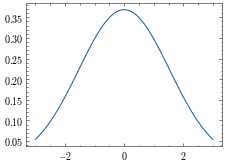

## 2D FREE PARTICLE

We will now deal with particles moving in two dimensions. We can extend the Fourier Transform Procedure for higher dimensions. Our solution will be expanded as:

$$\psi (x, y, t) = \int_{\mathbb{R}^2}\frac{d\vec{p}}{2\pi \hbar}c(\vec{p})e^{-\frac{i}{\hbar}(\frac{p^2}{2m}-\vec{p}\cdot\vec{x})}$$

Consider, for instance, a particle in an initial state 